# Scientific Python: 1

<br><br><br>

<span style="font-size: 24pt; font-weight: bold">Why Python?</span>

<br><br><br>

<br><br><br>

Python's most useful feature is that **it is widely used** for data analysis and machine learning.

<img src="img/analytics-by-language.svg">

<br><br><br>

<br><br><br>

Being popular means that is is **well-connected**. Just about everything has a Python interface.

<br><br>

(And being popular makes it well-connected... Round and round we go!)

<br><br><br>

<br><br><br>

In these four tutorials, we'll look at the ways Python is used in particle physics and science in general.

<br><br>

But first, we should review Python syntax, since we'll be using it so much.

<br><br>

I'll do it in the context of analyzing particle data, for fun.

<br><br><br>

## Navigation in Jupyter

<br><br><br>

1. Click the "..." to make a cell visible, but don't go ahead of me: follow along!
2. Click a code cell to edit it.
3. Control-enter to run the cell.
4. Shift-enter to run the cell and move to the next one.

<br><br><br>

## Review of Python syntax

### Desk calculator: variables and expressions

In [1]:
2 + 2

4

In [80]:
E = 68.1289790
px = -17.945541
py = 13.1652603
pz = 64.3908386

In [3]:
px

-17.945541

${p_x}^2 + {p_y}^2$

In [4]:
px**2 + py**2

495.36652054943704

$\displaystyle \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2}$

In [5]:
(px**2 + py**2 + pz**2) ** (1 / 2)

68.12889707136529

$\displaystyle p = \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2}$

$\displaystyle m = \sqrt{E^2 - p^2}$

**Quizlet:** fix the mistake!

In [6]:
m = (E**2 - px**2 + py**2 + pz**2) ** (1 / 2)
m

92.94632597460625

### Functions

In [7]:
def euclidean(x, y, z):
    return (x**2 + y**2 + z**2) ** (1 / 2)

In [8]:
euclidean(px, py, pz)

68.12889707136529

In [9]:
def minkowski(time, space):
    return (time**2 - space**2) ** (1 / 2)

In [10]:
minkowski(E, euclidean(px, py, pz))

0.10565709515008793

How does indenting work?

In [11]:
def mass(E, px, py, pz):
    def euclidean(x, y, z):
        return (x**2 + y**2 + z**2) ** (1 / 2)

    def minkowski(time, space):
        return (time**2 - space**2) ** (1 / 2)

    return minkowski(E, euclidean(px, py, pz))


mass(E, px, py, pz)

0.10565709515008793

Note: functions are objects that can be assigned to variables, too.

In [12]:
mag3d = euclidean

In [13]:
mag3d(px, py, pz)

68.12889707136529

### Importing functionality into Python

In [14]:
import math

In [15]:
math

<module 'math' from '/home/jpivarski/mambaforge/lib/python3.9/lib-dynload/math.cpython-39-x86_64-linux-gnu.so'>

Objects inside the module are accessible through the dot-syntax.

In [16]:
math.sqrt(E**2 - px**2 - py**2 - pz**2)

0.10565709514578395

It prevents functions with the same names in different libraries from conflicting.

In [17]:
import numpy

In [18]:
numpy.sqrt

<ufunc 'sqrt'>

In [19]:
math.sqrt

<function math.sqrt(x, /)>

In [20]:
numpy.sqrt is math.sqrt

False

Some libraries have conventional "short names."

In [21]:
import numpy as np

In [22]:
np.sqrt(E**2 - px**2 - py**2 - pz**2)

0.10565709514578395

Sometimes, it's better to extract only one object from a library.

In [23]:
from hepunits import GeV
from particle import Particle

In [24]:
muon = Particle.from_name("mu+")
muon

<Particle: name="mu+", pdgid=-13, mass=105.6583755 ± 0.0000023 MeV>

In [25]:
muon.mass / GeV

0.1056583755

In [26]:
?muon

Type:           Particle
String form:    mu+
File:           ~/mambaforge/lib/python3.9/site-packages/particle/particle/particle.py
Docstring:     
The Particle object class. Hold a series of properties for a particle.

Class properties:

C
    The charge conjugation parity quantum number, if relevant.
    It is C = (-1)^(L+S) for self-conjugate mesons.
    Mesons with PDG IDs of the kind 9XXXXXX (N=9) are not experimentally well-known particles
    and None is returned.

G
    The G-parity quantum number, if relevant.

I
    The isospin quantum number, if relevant.

P
    The parity quantum number, if relevant.
    It is P = (-1)^(L+1) for self-conjugate mesons and -1 for the photon.
    Mesons with PDG IDs of the kind 9XXXXXX (N=9) are not experimentally well-known particles
    and None is returned.

anti_flag
    The particle-antiparticle flag.

    A = B     - particle that has anti-particle partner different from particle
                with ASCII name formed by concatenation of

### Data types

Python data have types, but unlike C++, type correctness is checked just before computation, not in a separate compilation phase.

In [27]:
1 + "2"

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [28]:
type(1)

int

In [29]:
type("2")

str

_Therefore_, types are objects that you can inspect at runtime, unlike C++.

In [30]:
t1 = type(1)
t1

int

In [31]:
t2 = type("2")
t2

str

In [32]:
t1 is t2

False

Most type objects are functions that create or convert data to that type.

In [33]:
int("2")

2

In [34]:
t1("2")

2

**Quizlet:** before you run it, what will this do?

In [35]:
type(type(1)("2"))

int

### Relationships among types

NumPy has some types that look like standard Python types, but they're not.

In [36]:
np_one = np.int32(1)
np_one

1

In [37]:
np_int = type(np_one)
np_int

numpy.int32

`np.int32` is not Python `int`.

In [38]:
np_int == int

False

`np.int32` is also not `np.int64`.

In [39]:
np_int == type(np.int64(1))

False

`isinstance` is a better way to check the type of something.

It doesn't ask, "Is this type object the same object as that other one?"

It asks, "Is this value an instance of that type?"

In [40]:
isinstance(np_one, np.int32)

True

Because some types are _supertypes_ of others.

`np.integer` is a supertype of `np.int32` because any `np.int32` instance is also an `np.integer` instance.

In [41]:
isinstance(np_one, np.integer)

True

`np.integer` is a supertype of `np.int64` because any `np.int64` instance is also an `np.integer` instance.

In [42]:
isinstance(np.int64(1), np.integer)

True

<img src="img/dtype-hierarchy.png">

In [73]:
np.int32.mro()  # returns a list of a type's supertypes

[numpy.int32,
 numpy.signedinteger,
 numpy.integer,
 numpy.number,
 numpy.generic,
 object]

The only supertypes `np.int32` and `int` have in common is `object`.

(Everything in Python is an `object`.)

In [44]:
int.mro()

[int, object]

In [45]:
import numbers

In [46]:
isinstance(np.int32(1), numbers.Integral)

True

In [47]:
isinstance(1, numbers.Integral)

True

### Collection types

The two most basic collection types in Python are `list` and `dict`.

In [48]:
some_list = [0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]
some_list

[0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]

In [49]:
type(some_list)

list

In [50]:
len(some_list)

10

In [51]:
some_dict = {"one": 1.1, "two": 2.2, "three": 3.3}
some_dict

{'one': 1.1, 'two': 2.2, 'three': 3.3}

In [52]:
type(some_dict)

dict

In [53]:
len(some_dict)

3

You can pull data out of a collection with square brackets: `[` `]`.

In [54]:
some_list[3]

3.3

In [55]:
some_dict["two"]

2.2

You can also change the data in a collection with that syntax.

In [56]:
some_list[3] = 33333

In [57]:
some_list

[0.0, 1.1, 2.2, 33333, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]

In [58]:
some_dict["two"] = 22222

In [59]:
some_dict

{'one': 1.1, 'two': 22222, 'three': 3.3}

In [60]:
some_list.append("mixed types")

In [61]:
some_list

[0.0, 1.1, 2.2, 33333, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 'mixed types']

In [62]:
some_dict[123] = "mixed types"

In [63]:
some_dict

{'one': 1.1, 'two': 22222, 'three': 3.3, 123: 'mixed types'}

Ranges within a list can be "sliced" with `:`.

In [64]:
some_list[2:8]

[2.2, 33333, 4.4, 5.5, 6.6, 7.7]

**Quizlet:** before you run it, what will this do?

In [65]:
some_list[2:8][3]

5.5

**Philosophical question:** why does indexing start with zero?

### A little data analysis

In [81]:
particles = [
    {
        "type": "electron",
        "E": 171.848714,
        "px": 38.4242935,
        "py": -28.779644,
        "pz": 165.006927,
        "charge": 1,
    },
    {
        "type": "electron",
        "E": 138.501266,
        "px": -34.431419,
        "py": 24.6730384,
        "pz": 131.864776,
        "charge": -1,
    },
    {
        "type": "muon",
        "E": 68.1289790,
        "px": -17.945541,
        "py": 13.1652603,
        "pz": 64.3908386,
        "charge": 1,
    },
    {
        "type": "muon",
        "E": 18.8320473,
        "px": -8.1843795,
        "py": -7.6400470,
        "pz": 15.1420097,
        "charge": -1,
    },
]

In [86]:
def particle_decay(name, particle1, particle2):
    return {
        "type": name,
        "E": particle1["E"] + particle2["E"],
        "px": particle1["px"] + particle2["px"],
        "py": particle1["py"] + particle2["py"],
        "pz": particle1["pz"] + particle2["pz"],
        "charge": particle1["charge"] + particle2["charge"],
    }

Starting from the observed electrons and muons, we reconstruct the decays by adding energy and momentum.

<img src="img/higgs-to-four-leptons-diagram.png" width="600px">

In [87]:
z1 = particle_decay("Z boson", particles[0], particles[1])
z1

{'type': 'Z boson',
 'E': 310.34997999999996,
 'px': 3.992874499999999,
 'py': -4.106605600000002,
 'pz': 296.871703,
 'charge': 0}

In [88]:
z2 = particle_decay("Z boson", particles[2], particles[3])
z2

{'type': 'Z boson',
 'E': 86.9610263,
 'px': -26.129920499999997,
 'py': 5.5252133,
 'pz': 79.5328483,
 'charge': 0}

In [89]:
higgs = particle_decay("Higgs boson", z1, z2)
higgs

{'type': 'Higgs boson',
 'E': 397.3110063,
 'px': -22.137045999999998,
 'py': 1.4186076999999981,
 'pz': 376.40455130000004,
 'charge': 0}

**Quizlet:** define the `particle_mass` function and compute all of the following:

|          | mass (GeV/$c^2$) |
|:---------|-----------------:|
| $e^+$    |   0.0174851 |
| $e^-$    |   0.0097893 |
| $\mu^+$  |   0.1056570 |
| $\mu^-$  |   0.1056493 |
| $Z_1$    |  90.2856289 |
| $Z_2$    |  22.8789293 |
| $H$      | 125.2341336 |

In [100]:
def particle_mass(particle):
    ...

**Physics digression:** are the measured masses wrong?

The `particle` library gives us expected values.

In [103]:
Particle.from_name("e+").mass / GeV

0.0005109989499999999

In [104]:
Particle.from_name("e-").mass / GeV

0.0005109989499999999

In [105]:
Particle.from_name("mu+").mass / GeV

0.1056583755

In [106]:
Particle.from_name("mu-").mass / GeV

0.1056583755

In [107]:
Particle.from_name("Z0").mass / GeV

91.1876

In [109]:
Particle.from_name("H0").mass / GeV

125.25

### `for` loops and `if` branches

<br><br><br><br><br>

Can you believe we got this far without `for` and `if`?

<br><br>

These are the fundamental building blocks of _imperative_ programming.

<br><br><br><br><br>

Python runs a program, one statement at a time, and `for` tells it to repeat an indented block for each value of a collection.

In [114]:
for particle in particles:
    print(particle["type"], particle["charge"])

electron 1
electron -1
muon 1
muon -1


`if` tells it whether it should enter an indented block or not, depending on whether an expression is `True` or `False`.

In [112]:
for particle in particles:
    if particle["type"] == "electron":
        print(particle)

{'type': 'electron', 'E': 171.848714, 'px': 38.4242935, 'py': -28.779644, 'pz': 165.006927, 'charge': 1}
{'type': 'electron', 'E': 138.501266, 'px': -34.431419, 'py': 24.6730384, 'pz': 131.864776, 'charge': -1}


It can switch between two indented blocks if an `else` clause is given.

In [115]:
for particle in particles:
    if particle["type"] == "electron":
        print(particle)
    else:
        print("not an electron")

{'type': 'electron', 'E': 171.848714, 'px': 38.4242935, 'py': -28.779644, 'pz': 165.006927, 'charge': 1}
{'type': 'electron', 'E': 138.501266, 'px': -34.431419, 'py': 24.6730384, 'pz': 131.864776, 'charge': -1}
not an electron
not an electron


`if` statements can be nested.

In [117]:
for particle in particles:
    if particle["type"] == "electron":
        if particle["charge"] > 0:
            print("e+")
        else:
            print("e-")
    else:
        if particle["charge"] > 0:
            print("mu+")
        else:
            print("mu-")

e+
e-
mu+
mu-


and `elif` works as a contraction of `else if` (so that you don't have to indent as much).

In [118]:
for particle in particles:
    if particle["type"] == "electron" and particle["charge"] > 0:
        print("e+")
    elif particle["type"] == "electron" and particle["charge"] < 0:
        print("e-")
    elif particle["type"] == "muon" and particle["charge"] > 0:
        print("mu+")
    elif particle["type"] == "muon" and particle["charge"] < 0:
        print("mu-")

e+
e-
mu+
mu-


### From datum (singular) to data (plural)

In [121]:
import json

In [122]:
dataset = json.load(open("data/SMHiggsToZZTo4L.json"))

In [124]:
type(dataset)

list

In [125]:
len(dataset)

10000

Show just the first 3 collision events using a slice, `0:3`.

In [123]:
dataset[0:3]

[{'run': 1,
  'luminosityBlock': 156,
  'event': 46501,
  'PV': {'x': 0.24369880557060242,
   'y': 0.3936990201473236,
   'z': 1.451307773590088},
  'electron': [],
  'muon': [{'pt': 63.04386901855469,
    'eta': -0.7186822295188904,
    'phi': 2.968005895614624,
    'mass': 0.10565836727619171,
    'charge': 1,
    'pfRelIso03_all': 0.0,
    'pfRelIso04_all': 0.0,
    'dxy': -0.004785160068422556,
    'dxyErr': 0.0060764215886592865,
    'dz': 0.09005985409021378,
    'dzErr': 0.044572051614522934},
   {'pt': 38.12034606933594,
    'eta': -0.8794569969177246,
    'phi': -1.0324749946594238,
    'mass': 0.10565836727619171,
    'charge': -1,
    'pfRelIso03_all': 0.0,
    'pfRelIso04_all': 0.0,
    'dxy': 0.0005746808601543307,
    'dxyErr': 0.0013040687190368772,
    'dz': -0.0032290113158524036,
    'dzErr': 0.003023269586265087},
   {'pt': 4.04868745803833,
    'eta': -0.320764422416687,
    'phi': 1.0385035276412964,
    'mass': 0.10565836727619171,
    'charge': 1,
    'pfRelIso03

<br><br>

**Meaning of each field.** (We will only use a few of these.)

 * **run** (int): unique identifier for a data-taking period of the LHC. This is simulated data, so the run number is 1.
 * **luminosityBlock** (int): unique identifier for a period of relatively stable conditions within a run.
 * **event** (int): unique identifier for one crossing of LHC bunches.
 * **PV** (dict): primary vertex of the collision.
   - **x** (float): $x$-position in cm.
   - **y** (float): $y$-position in cm.
   - **z** (float): $z$-position (along the beamline) in cm.
 * **electron** (list of dict): list of electrons (may be empty).
   - **pt** (float): $p_T$ component of momentum transverse to the beamline in GeV/$c$.
   - **eta** (float): $\eta$ pseudorapidity (roughly, polar angle with respect to the beamline), unitless.
   - **phi** (float): $\phi$ azimuthal angle (in the plane that is perpendicular to the beamline), unitless.
   - **mass** (float): measured mass of the particle in GeV/$c^2$.
   - **charge** (int): either `+1` or `-1`, unitless.
   - **pfRelIso03_all** (float): quantity that specifies how isolated this electron is from the rest of the particles in the event, unitless.
   - **dxy** (float): distance of closest approach to the primary vertex in the plane that is perpendicular to the beamline, in cm.
   - **dxyErr** (float): uncertainty in the **dxy** measurement.
   - **dz** (float): distance of closest approach to the primary vertex in $z$, along the beamline, in cm.
   - **dzErr** (float): uncertainty in the **dz** measurement.
 * **muon** (list of dict): list of muons (may be empty) with the same dict fields as **electron**.
 * **MET** (dict): missing transverse energy (in the plane perpendicular to the beamline).
   - **pt** (float): $p_T$ magnitude, in GeV/$c$.
   - **phi** (float): $\phi$ aximuthal angle, unitless.

<br><br>

<br><br>

**Coordinate transformations:**

  * $p_x = p_T \cos\phi \cosh\eta$
  * $p_y = p_T \sin\phi \cosh\eta$
  * $p_z = p_T \sinh\eta$

  * $\displaystyle E = \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2 + m^2}$

<br><br>

But there's a library for that.

In [127]:
import vector

In [133]:
def to_vector(particle):
    return vector.obj(
        pt=particle["pt"],
        eta=particle["eta"],
        phi=particle["phi"],
        mass=particle["mass"],
    )

In [135]:
for particle in dataset[0]["muon"]:
    v = to_vector(particle)
    print(v.E, v.px, v.py, v.pz)

80.03810173614954 -62.09642131826239 10.888704252275756 -49.31082178393471
53.837451985499946 19.5441283607252 -32.729005959017954 -38.01709205284513
4.260074277908423 2.05475040026448 3.4885342087314886 -1.3210598131215057


### Mini-project: let's make an event display

There are lots, and lots, and lots of libraries for visualizing data in Python.

Matplotlib is the oldest and most popular.

In [142]:
import matplotlib.pyplot as plt  # conventional short name for Matplotlib
from mpl_toolkits.mplot3d import Axes3D

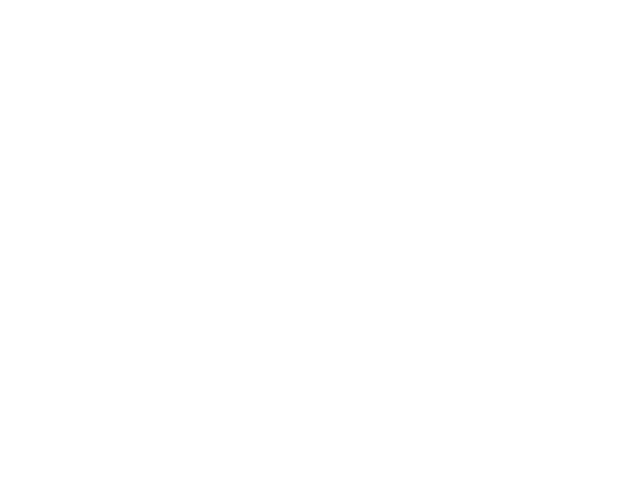

In [137]:
%matplotlib widget

fig = plt.figure()

In [141]:
fig.clf()  # clear figure
ax = fig.add_subplot(111, projection="3d")

# 25 Gaussian-distributed (x, y, z) triplets
for x, y, z in np.random.normal(0, 1, (25, 3)):
    # make a black line from (0, 0, 0) to (x, y, z)
    ax.plot([0, x], [0, y], [0, z], c="black")

In [143]:
def draw_particle(ax, particle, color):
    v = to_vector(particle)
    ax.plot([0, v.px], [0, v.py], [0, v.pz], c=color)

In [144]:
def draw_event(ax, event):
    for particle in event["electron"]:
        draw_particle(ax, particle, "blue")
    for particle in event["muon"]:
        draw_particle(ax, particle, "green")

In [152]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

draw_event(ax, dataset[0])

In [153]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

for event in dataset[0:10]:
    draw_event(ax, event)

Add more to the event display, for context.

In [154]:
def beamline(ax):
    ax.plot([0, 0], [0, 0], [-100, 100], c="black", ls=":")

In [155]:
def cms_outline(ax):
    z = np.linspace(-100, 100, 50)
    theta = np.linspace(0, 2 * np.pi, 12)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = 100 * np.cos(theta_grid)
    y_grid = 100 * np.sin(theta_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.2, color="red")

In [157]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

beamline(ax)
cms_outline(ax)
draw_event(ax, dataset[6417])  # has electrons and muons

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Text(0.5, 0, 'z')

In [161]:
def draw_position_and_momentum(ax, event, particle, color):
    # 1 unit is 1 cm
    x0 = event["PV"]["x"] - particle["dxy"] * np.cos(particle["phi"])
    y0 = event["PV"]["y"] - particle["dxy"] * np.sin(particle["phi"])
    z0 = event["PV"]["z"] - particle["dz"]
    
    # 1 unit is 1 GeV/c
    v = to_vector(particle)
    ax.plot([x0, x0 + v.px], [y0, y0 + v.py], [z0, z0 + v.pz], c=color)

In [162]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

beamline(ax)

event = dataset[6417]
for particle in event["electron"]:
    draw_position_and_momentum(ax, event, particle, "blue")
for particle in event["muon"]:
    draw_position_and_momentum(ax, event, particle, "green")

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Text(0.5, 0, 'z')

### Classes and object-oriented programming

So far, we have only been using a few Python types:

  * int
  * float
  * string
  * list
  * dict
  * whatever the libraries provide

In [163]:
type(muon)

particle.particle.particle.Particle

In [164]:
type(fig)

matplotlib.figure.Figure

In [165]:
type(ax)

mpl_toolkits.mplot3d.axes3d.Axes3D

In [166]:
type(v)

vector.backends.object.MomentumObject4D

<br><br><br><br><br>

The electrons, muons, and events in our dataset really want to be classes.

<br><br>

A class is a new type with **attributes** (variables) and **methods** (functions) that can be accessed by the dot-syntax.

<br><br>

The biggest difference between a **method** and a **function** is that it always takes `self` (the object) as its first argument.

<br><br>

Methods with names like `__xyz__` give the object special abilities.

<br><br><br><br><br>

In [167]:
class Electron:
    def __init__(self, particle_as_dict):
        v = to_vector(particle_as_dict)
        self.E = v.E
        self.px = v.px
        self.py = v.py
        self.pz = v.pz
    
    def __repr__(self):
        return f"<Electron E={self.E} px={self.px} py={self.py} pz={self.pz}>"
    
    def draw(self, ax):
        ax.plot([0, self.px], [0, self.py], [0, self.pz], c="blue")

In [169]:
electron_objects = []
for particle in dataset[6417]["electron"]:
    electron_objects.append(Electron(particle))

In [168]:
class Muon:
    def __init__(self, particle_as_dict):
        v = to_vector(particle_as_dict)
        self.E = v.E
        self.px = v.px
        self.py = v.py
        self.pz = v.pz
    
    def __repr__(self):
        return f"<Muon E={self.E} px={self.px} py={self.py} pz={self.pz}>"
    
    def draw(self, ax):
        ax.plot([0, self.px], [0, self.py], [0, self.pz], c="green")

In [170]:
muon_objects = []
for particle in dataset[6417]["muon"]:
    muon_objects.append(Muon(particle))

In [171]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

beamline(ax)
cms_outline(ax)

for electron in electron_objects:
    electron.draw(ax)

for muon in muon_objects:
    muon.draw(ax)